# Predictions on different data quality

## Parameters and model

In [1]:
import sys
sys.path.append('..')

from util.graphs import plot_series
from timeseries.timeseries import StockMarketSeries
from timeseries.enums import SeriesColumn, DeviationSource
from predictions.normal.model import PredictionModel

company_name = "Intel"
time_series_start = "2017-01-03"
time_series_values = 300
column = SeriesColumn.CLOSE
stock = StockMarketSeries(company_name, time_series_start, time_series_values,
                           weights={SeriesColumn.OPEN: 0.2,
                                    SeriesColumn.CLOSE: 0.2,
                                    SeriesColumn.ADJ_CLOSE: 0.25,
                                    SeriesColumn.HIGH: 0.15,
                                    SeriesColumn.LOW: 0.15,
                                    SeriesColumn.VOLUME: 0.05})

## Data - one price column

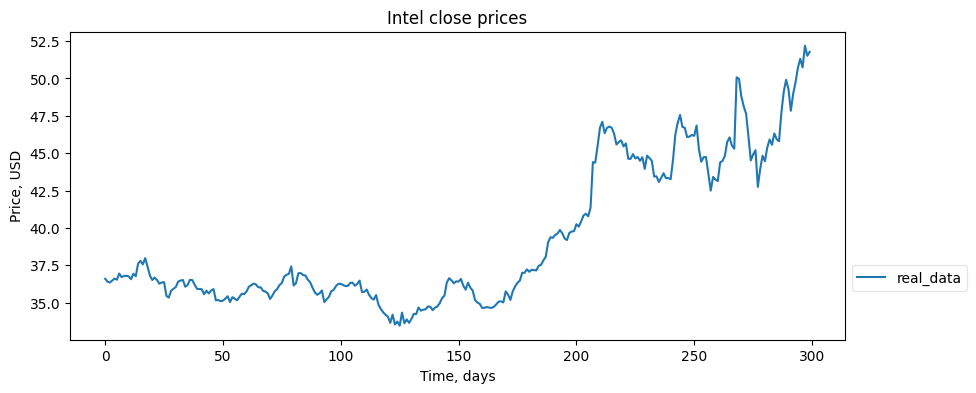

In [2]:
plot_series(stock, "close prices", real_data=stock.real_series[SeriesColumn.CLOSE])

## Predictions parameters

In [3]:
prediction_start = 260
iterations = 5

model = PredictionModel(stock, prediction_start, column, iterations=iterations)

## Statistical methods

In [4]:
from normal.arima import ManualArima, AutoArimaSF

arima_type = AutoArimaSF

C:\Users\Maciek\AppData\Local\Programs\Python\Python39\lib\site-packages\statsforecast\core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


## AR(5)

In [5]:
arima = model.configure_model(arima_type, p=5, q=0)

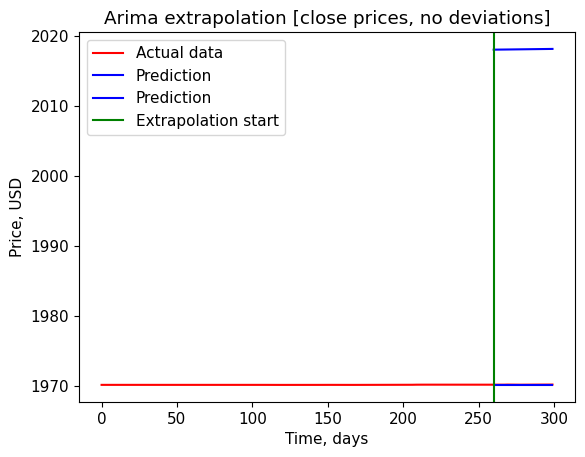

In [6]:
%%capture --no-stdout --no-display
arima.plot_prediction(source=DeviationSource.NONE)

In [7]:
%%capture --no-stdout --no-display
arima.compute_statistics_set()

Statistics [Intel stock, close price, 5 iterations]

  Deviation Scale Mitigation Time [ms] Time SD M. time RMSE  MAE MAPE MAPE SD
0       NaN   NaN        NaN       NaN     NaN     NaN  NaN  NaN  NaN     NaN

\begin{tabular}{llllllllll}
\toprule
Deviation & Scale & Mitigation & Time [ms] & Time SD & M. time & RMSE & MAE & MAPE & MAPE SD \\
\midrule
      NaN &   NaN &        NaN &       NaN &     NaN &     NaN &  NaN & NaN &  NaN &     NaN \\
\bottomrule
\end{tabular}



## ARIMA(p,d,q)

In [8]:
arima = model.configure_model(arima_type, p=4, q=4)

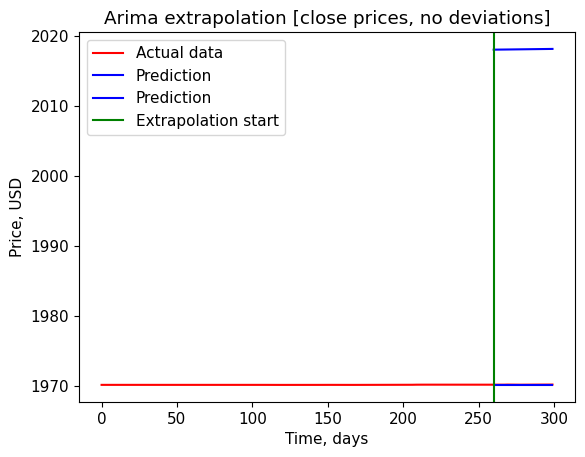

In [9]:
%%capture --no-stdout --no-display
arima.plot_prediction(source=DeviationSource.NONE)

In [10]:
%%capture --no-stdout --no-display
arima.compute_statistics_set()

KeyboardInterrupt: 

## XGBoost

In [11]:
from normal.ml import XGBoost

xgboost = model.configure_model(XGBoost, optimize=False)

KeyboardInterrupt: 

In [ ]:
xgboost.plot_prediction(source=DeviationSource.NONE)

In [ ]:
%%capture --no-stdout --no-display
xgboost.compute_statistics_set()

## Reservoir computing

In [ ]:
from predictions.normal.ml import Reservoir

reservoir = model.configure_model(Reservoir)

In [ ]:
reservoir.plot_prediction(source=DeviationSource.NONE)

In [ ]:
%%capture --no-stdout --no-display
reservoir.compute_statistics_set()